<a href="https://colab.research.google.com/github/david-siqi-liu/cs684-final-project/blob/master/cs684_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Download Data

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
from urllib.request import urlretrieve
import os
from zipfile import ZipFile

def download(url, file):
    if not os.path.isfile(file):
        urlretrieve(url, file)

#If the downloaded file is a zip file than you can use below function to unzip it.
def uncompress_features_labels(source, file, dest):
    if not os.path.isdir(file):
        with ZipFile(source) as zipf:
            zipf.extractall(dest)

'clipart.zip', 'infograph.zip', 'quickdraw.zip', 'real.zip', 'sketch.zip'

In [0]:
for file in ['quickdraw.zip']:
  download('http://csr.bu.edu/ftp/visda/2019/multi-source/' + file,
           file)
  print("Downloaded: {0}".format(file))
  uncompress_features_labels(file,
                             'drive/My Drive/Colab Notebooks/data/' + file.split('.zip')[0],
                             'drive/My Drive/Colab Notebooks/data/')
  print("Extracted: {0}".format(file))

Downloaded: quickdraw.zip


Exception ignored in: <bound method _MultiProcessingDataLoaderIter.__del__ of <torch.utils.data.dataloader._MultiProcessingDataLoaderIter object at 0x7f7b1cde2fd0>>
Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/torch/utils/data/dataloader.py", line 926, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.6/dist-packages/torch/utils/data/dataloader.py", line 906, in _shutdown_workers
    w.join()
  File "/usr/lib/python3.6/multiprocessing/process.py", line 124, in join
    res = self._popen.wait(timeout)
  File "/usr/lib/python3.6/multiprocessing/popen_fork.py", line 50, in wait
    return self.poll(os.WNOHANG if timeout == 0.0 else 0)
  File "/usr/lib/python3.6/multiprocessing/popen_fork.py", line 28, in poll
    pid, sts = os.waitpid(self.pid, flag)
KeyboardInterrupt: 


In [0]:
# for file in ['clipart', 'infograph', 'quickdraw', 'real', 'sketch']:
#   download('http://csr.bu.edu/ftp/visda/2019/multi-source/domainnet/txt/' + file + '_train.txt',
#            'drive/My Drive/Colab Notebooks/label/' + file + '_train.txt')
#   download('http://csr.bu.edu/ftp/visda/2019/multi-source/domainnet/txt/' + file + '_test.txt',
#            'drive/My Drive/Colab Notebooks/label/' + file + '_test.txt')

In [5]:
!wc -l drive/My\ Drive/Colab\ Notebooks/label/*_train.txt

   33525 drive/My Drive/Colab Notebooks/label/clipart_train.txt
   36023 drive/My Drive/Colab Notebooks/label/infograph_train.txt
  120750 drive/My Drive/Colab Notebooks/label/quickdraw_train.txt
  120906 drive/My Drive/Colab Notebooks/label/real_train.txt
   48212 drive/My Drive/Colab Notebooks/label/sketch_train.txt
  359416 total


In [6]:
!wc -l drive/My\ Drive/Colab\ Notebooks/label/*_test.txt

  14604 drive/My Drive/Colab Notebooks/label/clipart_test.txt
  15582 drive/My Drive/Colab Notebooks/label/infograph_test.txt
  51750 drive/My Drive/Colab Notebooks/label/quickdraw_test.txt
  52041 drive/My Drive/Colab Notebooks/label/real_test.txt
  20916 drive/My Drive/Colab Notebooks/label/sketch_test.txt
 154893 total


# Install Packages

In [0]:
# # PyTorch
# !pip3 install torch==1.2.0+cu92 torchvision==0.4.0+cu92 -f https://download.pytorch.org/whl/torch_stable.html

Looking in links: https://download.pytorch.org/whl/torch_stable.html
     |████████████████████████████████| 663.1MB 28kB/s 
     |████████████████████████████████| 8.8MB 49.5MB/s 
  Found existing installation: torch 1.3.1
    Uninstalling torch-1.3.1:
      Successfully uninstalled torch-1.3.1
  Found existing installation: torchvision 0.4.2
    Uninstalling torchvision-0.4.2:
      Successfully uninstalled torchvision-0.4.2


# Import Packages

In [0]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.utils.data as data
import torchvision
from torchvision import datasets, transforms, models
from torch.autograd import Variable
from PIL import Image, ImageColor
import os
import random

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Playground - CNN with MNIST

## Load Data

In [0]:
BATCH_SIZE = 32

## transformations
transform = transforms.Compose(
    [transforms.ToTensor()])

## download and load training dataset
trainset = torchvision.datasets.MNIST(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=BATCH_SIZE,
                                          shuffle=True, num_workers=2)

## download and load testing dataset
testset = torchvision.datasets.MNIST(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=BATCH_SIZE,
                                         shuffle=False, num_workers=2)

0it [00:00, ?it/s]

9920512it [00:01, 9168746.75it/s]                            


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw


  0%|          | 0/28881 [00:00<?, ?it/s]

32768it [00:00, 141860.75it/s]           
  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw


1654784it [00:00, 2307312.90it/s]                            
0it [00:00, ?it/s]

Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw


8192it [00:00, 48170.72it/s]            


Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw
Processing...
Done!


## EDA

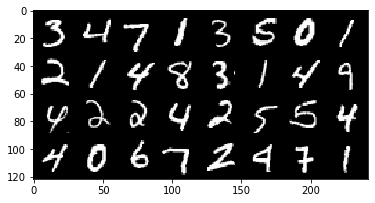

In [0]:
## functions to show an image
def imshow(img):
    #img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))

## get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()

## show images
imshow(torchvision.utils.make_grid(images))

In [0]:
for images, labels in trainloader:
    print("Image batch dimensions:", images.shape)
    print("Image label dimensions:", labels.shape)
    break

Image batch dimensions: torch.Size([32, 1, 28, 28])
Image label dimensions: torch.Size([32])


## Model

In [0]:
class MyModel(nn.Module):
    def __init__(self):
        super(MyModel, self).__init__()

        # 28x28x1 => 26x26x32
        # Grayscale so we only need one channel going in, hence in_channels=1
        # We use out_channels=32
        # Kernel size is 3
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=32, kernel_size=3)
        # Dense layer, linear transformation of data
        # Output dimension = 128
        self.d1 = nn.Linear(26 * 26 * 32, 128)
        # Input dimension = 128, 10 is the number of classes
        self.d2 = nn.Linear(128, 10)

    def forward(self, x):
        # 32x1x28x28 => 32x32x26x26
        x = self.conv1(x)
        # ReLu activation function
        x = F.relu(x)

        # flatten => 32 x (32*26*26)
        x = x.flatten(start_dim = 1)

        # 32 x (32*26*26) => 32x128
        x = self.d1(x)
        x = F.relu(x)

        # logits => 32x10
        logits = self.d2(x)
        # SoftMax
        out = F.softmax(logits, dim=1)
        return out

In [0]:
## test the model with 1 batch
model = MyModel()
for images, labels in trainloader:
    print("batch size:", images.shape)
    out = model(images)
    print(out.shape)
    break

batch size: torch.Size([32, 1, 28, 28])
torch.Size([32, 10])


## Training

In [0]:
learning_rate = 0.001
num_epochs = 5

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model = MyModel()
model = model.to(device)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

## compute accuracy
def get_accuracy(logit, target, batch_size):
    ''' Obtain accuracy for training round '''
    corrects = (torch.max(logit, 1)[1].view(target.size()).data == target.data).sum()
    accuracy = 100.0 * corrects/batch_size
    return accuracy.item()

In [0]:
for epoch in range(num_epochs):
    train_running_loss = 0.0
    train_acc = 0.0

    model = model.train()

    ## training step
    for i, (images, labels) in enumerate(trainloader):
        
        images = images.to(device)
        labels = labels.to(device)

        ## forward + backprop + loss
        logits = model(images)
        loss = criterion(logits, labels)
        optimizer.zero_grad()
        loss.backward()

        ## update model params
        optimizer.step()

        train_running_loss += loss.detach().item()
        train_acc += get_accuracy(logits, labels, BATCH_SIZE)
    
    model.eval()
    print('Epoch: %d | Loss: %.4f | Train Accuracy: %.2f' \
          %(epoch, train_running_loss / i, train_acc/i)) 

Epoch: 0 | Loss: 1.5975 | Train Accuracy: 86.25
Epoch: 1 | Loss: 1.4929 | Train Accuracy: 96.69
Epoch: 2 | Loss: 1.4821 | Train Accuracy: 97.78
Epoch: 3 | Loss: 1.4767 | Train Accuracy: 98.36
Epoch: 4 | Loss: 1.4737 | Train Accuracy: 98.68


## Test

In [0]:
test_acc = 0.0
for i, (images, labels) in enumerate(testloader, 0):
    images = images.to(device)
    labels = labels.to(device)
    outputs = model(images)
    test_acc += get_accuracy(outputs, labels, BATCH_SIZE)
        
print('Test Accuracy: %.2f'%( test_acc/i))

Test Accuracy: 98.12


# Model 1 - Train on Quickdraw, Test on Quickdraw

## Load Images

In [2]:
!ls drive/My\ Drive/Colab\ Notebooks/data

clipart  infograph  real  sketch


In [0]:
# Directories
home_dir = 'drive/My Drive/Colab Notebooks/'
img_dir = home_dir + 'data/'
label_dir = home_dir + 'label/'

In [0]:
###### LIST LOADER #######

# Reference: https://github.com/Panda-Peter/visda2019-multisource/blob/master/Adapt/datasets/list_loader.py

def default_loader(path):
    """Default loader
    """
    return Image.open(path).convert('RGB')

def collect_images(img_dir, labels):
  """Return a list of (image path, label)

  Parameters:
  img_dir (String) : the directory containing the images
  labels (List[String]) : a list of labels (possibly with multiple sources together)

  Returns:
  List[(String, String)]
  """
  images = []
  for line in labels:
    data = line.strip().split(' ')
    path = os.path.join(img_dir, data[0])
    # Unlabelled target data (i.e. clipart)
    if (len(data) == 1):
      label = None
    else:
      label = int(data[1])
    item = (path, label)
    images.append(item)
  return images

class MyDataset(data.Dataset):
    """ Custom class for loading image list
    """
    def __init__(self, img_dir, labels, transform=None, loader=default_loader):
        imgs = collect_images(img_dir, labels)
        self.img_dir = img_dir
        self.imgs = imgs
        self.transform = transform
        self.loader = loader

    def __getitem__(self, index):
        path, label = self.imgs[index]
        img = self.loader(path)

        if self.transform is not None:
            img = self.transform(img)
        return index, img, label

    def __len__(self):
        return len(self.imgs)

In [0]:
def make_data_set(img_dir, label_dir, domain_list, transforms, train_or_test):
  labels = []
  for domain in domain_list:
    # E.g. "drive/My Drive/Colab Notebooks/label/infograph_test.txt"
    label_file = label_dir + domain + '_' + train_or_test + '.txt'
    for line in open(label_file):
      labels.append(line)
  return MyDataset(img_dir, labels, transforms)

def make_data_loader(dataset, train_or_test):
  if (train_or_test == 'train'):
    return data.DataLoader(dataset, batch_size=4,
                           shuffle=True, num_workers=4)
  else:
    return data.DataLoader(dataset, batch_size=4,
                           shuffle=False, num_workers=4)

In [0]:
###### TRAINER ######

class Trainer(object):
    def __init__(self, args):
        super(Trainer, self).__init__()
        self.args = args
        self.num_gpus = 1 # Only one GPU on Google Colab Q_Q
        self.device = torch.device("cuda")

        # Random seed
        self.seed = 647
        if self.seed > 0:
            random.seed(self.seed)
            torch.manual_seed(self.seed)
            torch.cuda.manual_seed_all(self.seed)

        # Initialize data and list loader
        self.setup_loader()
        # self.init_network()
        # self.iteration = 0

    def setup_loader(self):
        # Directories
        self.home_dir = 'drive/My Drive/Colab Notebooks/'
        self.img_dir = home_dir + 'data/'
        self.label_dir = home_dir + 'label/'
        self.source = ['infograph']
        self.target = ['clipart']

        train_transforms = transforms.Compose([transforms.Resize([200, 200]),
                                               transforms.RandomHorizontalFlip(p=0.5),
                                               transforms.RandomCrop([180, 180]),
                                               transforms.ToTensor(),
                                               transforms.Normalize([0.485, 0.456, 0.406],
                                                                    [0.229, 0.224, 0.225])])
        
        test_transforms = transforms.Compose([transforms.Resize([200, 200]),
                                              transforms.CenterCrop([180, 180]),
                                              transforms.ToTensor(),
                                              transforms.Normalize([0.485, 0.456, 0.406],
                                                                   [0.229, 0.224, 0.225])])
        
        self.source_train_dataset = make_data_set(self.img_dir, self.label_dir, self.source, train_transforms, 'train')
        self.source_train_dataloader = make_data_loader(self.source_train_dataset, 'train')
        self.source_test_dataset = make_data_set(self.img_dir, self.label_dir, self.source, test_transforms, 'test')
        self.source_test_dataloader = make_data_loader(self.source_train_dataset, 'test')

        self.target_train_dataset = make_data_set(self.img_dir, self.label_dir, self.target, train_transforms, 'train')
        self.target_train_dataloader = make_data_loader(self.target_train_dataset, 'train')
        self.target_test_dataset = make_data_set(self.img_dir, self.label_dir, self.target, test_transforms, 'test')
        self.target_test_dataloader = make_data_loader(self.target_train_dataset, 'test')

    # def eval(self, epoch):
    #   result_folder = 'drive/My Drive/Colab Notebooks/result/'
    #   if not os.path.exists(result_folder):
    #     os.mkdir(result_folder)

      # loaders = []
      # names = []
      # loaders.append(self.target_test_loader)
      # names.append('clipart')

      # for i, loader in enumerate(loaders):
      #     mean_acc, preds = evaluation.eval(epoch, names[i], loader, self.netG, self.netE)
      #     if mean_acc is not None:
      #         if (self.distributed == False) or (dist.get_rank() == 0):
      #             #self.logger.info(mean_acc)
      #             with open(os.path.join(result_folder, str(epoch) + '_' + names[i] + '.txt'), 'w') as fid:
      #                 for v in preds:
      #                     fid.write(str(v) + '\n')

    # def train_model(self):
    #   # self.model.train(mode = True)

    def train(self):
      max_epoch = 50

      for epoch in range(0, max_epoch):
        # Train model
        # self.eval(epoch)
        # self.train_mode()

        # 
        for idx, imgs, labels in self.source_train_dataloader:
          imgs = Variable(imgs.cuda())
          labels = Variable(labels.cuda())

          # self.optim.zero_grad()
          # _, sup_pool5_out = self.netG(imgs)
          # _, sup_logits_out = self.netE(sup_pool5_out)

          # loss_arr = []
          # loss_w = []

          # # source cross entropy loss
          # loss, loss_info = self.cross_ent(sup_logits_out, labels)
          # loss_arr.append(loss_info)
          # loss_w.append(cfg.LOSSES.CROSS_ENT_WEIGHT)

          # self.display(self.iteration, loss, loss_arr, loss_w)

          # loss.backward()
          # self.optim.step(epoch)
          # self.iteration += 1
        
        # self.save_model(epoch + 1)
        # _, self.source_train_loader = data_loader.load_mergesource_train(self.source_image_set)

      

In [0]:
trainer = Trainer(None)

In [0]:
def imshow(inp, title=None):
    """Imshow for Tensor."""
    inp = inp.numpy().transpose((1, 2, 0))
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    inp = std * inp + mean
    inp = np.clip(inp, 0, 1)
    plt.imshow(inp)
    if title is not None:
        plt.title(title)
    plt.pause(0.001)  # pause a bit so that plots are updated

In [0]:
sample_idx, sample_img, sample_label = next(iter(trainer.source_train_dataloader))

In [0]:
out = torchvision.utils.make_grid(sample_img)

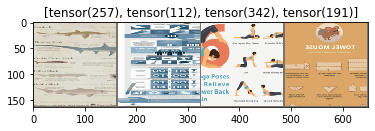

In [38]:
imshow(out, title=[x for x in sample_label])